<a href="https://colab.research.google.com/github/Pedro-HMC-Martins/PLN/blob/main/Projeto_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install huggingface

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=acbcee3c7801be7fc368060dcb4dce035fd679df610f62140b348ad79eb6d5c1
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
import zipfile
import os
import shutil
from warnings import simplefilter
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Leitura do arquivo

Leitura do arquivo zip contendo arquivos txt com cada debate do conselho de segurança da ONU (1995 - 2020), o arquivo contêm 82165 arquivos txt.

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/DataBase PLN.zip', 'r') as z:
    lista_nomes_arquivos = z.namelist()
    df = pd.DataFrame()

    for nome_arquivo in lista_nomes_arquivos:
        if nome_arquivo.endswith('.txt'):
            z.extract(nome_arquivo, 'temp_dir')
            caminho_completo = os.path.join('temp_dir', nome_arquivo)
            with open(caminho_completo, 'r') as f:
                texto = f.read()
                df = df.append({'nome_arquivo': nome_arquivo, 'texto': texto}, ignore_index=True)
            os.remove(caminho_completo)

    shutil.rmtree('temp_dir')

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-4-63a769b0b870>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'nome_arquivo': nome_arquivo, 'texto': texto}, ignore_index=True)
<ipython-input-4-63a769b0b870>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'nome_arquivo': nome_arquivo, 'texto': texto}, ignore_index=True)
<ipython-input-4-63a769b0b870>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'nome_arquivo': nome_arquivo, 'texto': texto}, ignore_index=True)
<ipython-input-4-63a769b0b870>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

In [ ]:
df.head()

nome_arquivo  \
0  DataBase PLN/speeches/UNSC_1995_SPV.3486_spch0...   
1  DataBase PLN/speeches/UNSC_1995_SPV.3487_spch0...   
2  DataBase PLN/speeches/UNSC_1995_SPV.3487_spch0...   
3  DataBase PLN/speeches/UNSC_1995_SPV.3487_spch0...   
4  DataBase PLN/speeches/UNSC_1995_SPV.3487_spch0...   

                                               texto  
0  The President (interpretation from Spanish): A...  
1  The President (interpretation from Spanish): I...  
2  Mr. Sacirbey (Bosnia and Herzegovina): First,\...  
3  The President (interpretation from Spanish): T...  
4  Mr. Nobilo (Croatia): Allow me, Sir, to congra...

Gerando representações vetoriais de sentenças, distilBERT é uma versão menor e mais rapida do modelo BERT.

In [ ]:
df.shape

(82165, 2)

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

###Limpeza dos dados/textos

Aqui fazemos uma limpeza nos textos, utilizando regex , pois apresentam muitos marcadores de quebra de linha, alem disso possuem caracteres especiais.

In [ ]:
df['texto'][0]

'The President (interpretation from Spanish): As this\nis the first meeting of the Security Council to be held this\nyear, I should like to welcome the new members of the\nCouncil: Botswana, Germany, Honduras, Indonesia and\nItaly. We all look forward with confidence to their\nparticipation in the work of the Council, which will be of\ninvaluable assistance in the discharge of the Council\'s\nenormous responsibilities as it tackles so many challenges.\n\nI should also like to express the Council\'s gratitude to\nthe outgoing members for their important contributions to\nthe Council\'s work. The representatives of Brazil, Djibouti,\nNew Zealand, Pakistan and Spain all, in an excellent\nmanner, contributed their talents to the conduct of the\nbusiness of the Council.\n\nExpression of thanks to the retiring President\n\nThe President (interpretation from Spanish): I should\nalso like to pay a tribute to my predecessor, Ambassador\nManzi Bakuramutsa of Rwanda, for the service he rendered\n

In [ ]:
import re

#utiliza regex para limpar o texto
def limpar_texto(text):
    text = re.sub(r'\s+', ' ', text) #procura por mais de uma ocorrencia de espaço em branco
    text = re.sub(r'[^A-Za-z0-9áéíóúÁÉÍÓÚñÑüÜ]', ' ', text) #retira todos os caracteres especiais deixando apenas letras maiusculas e minusculas
    text = re.sub(r' +', ' ', text)#depois de substituir por espacos , retira os excessos de espaço em branco
    return text.strip()# retira o excesso de espaço em branco do final e do começo de cada arquivo

In [ ]:
df['texto_limpo'] = df['texto'].apply(limpar_texto)

coloca o texto em letra minúsculas.

In [ ]:
df['texto_limpo'] = df['texto_limpo'].str.lower()

In [ ]:
texto = list(df['texto_limpo'])

Texto limpo.

In [ ]:
texto[0]

'the president interpretation from spanish as this is the first meeting of the security council to be held this year i should like to welcome the new members of the council botswana germany honduras indonesia and italy we all look forward with confidence to their participation in the work of the council which will be of invaluable assistance in the discharge of the council s enormous responsibilities as it tackles so many challenges i should also like to express the council s gratitude to the outgoing members for their important contributions to the council s work the representatives of brazil djibouti new zealand pakistan and spain all in an excellent manner contributed their talents to the conduct of the business of the council expression of thanks to the retiring president the president interpretation from spanish i should also like to pay a tribute to my predecessor ambassador manzi bakuramutsa of rwanda for the service he rendered as president of the council during the month of de

###Transformação para embeddings

Aqui fazemos a transformação dos textos para representações vetoriais ou Embeddings.

In [ ]:
texto_embeddings = embedder.encode(texto)

In [ ]:
from sklearn.cluster import KMeans

###Em busca do melhor K para KMeans

Calculo do Silhouette Score e plote do gráfico para verificar qual seria o melhor K para coloca no número de agrupamentos, apesar da métrica ser mais favorável a somente 2 clusters , decidimos fazer o Elbow Method (cotovelo) para termos uma segunda visualização do que poderia ser o melhor K para o modelo.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import silhouette_score

def melhor_K(entrada, max_k):

    silhouette_scores = []
    K = range(2, max_k+1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(entrada)
        clusters = kmeans.predict(entrada)

        score = silhouette_score(entrada, clusters)
        silhouette_scores.append(score)

    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bo-', color='blue', linewidth=2, markersize=8, markeredgewidth=2, markeredgecolor='blue', markerfacecolor='red')
    plt.title('Silhouette Scores para diferentes numero de cluster')
    plt.xlabel('numero de clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()


In [ ]:
melhor_K(texto_embeddings,8)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

Metodo do cotovelo.

In [ ]:
def cotovelo_K(data, max_k):
    wcss = []
    K = range(1, max_k+1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, wcss, 'bo-', color='blue', linewidth=2, markersize=8, markeredgewidth=2, markeredgecolor='blue', markerfacecolor='red')
    plt.title('Metodo cotovelo para melhor k')
    plt.xlabel('Numero de Clusters (k)')
    plt.ylabel('(WCSS)')
    plt.show()

In [ ]:
cotovelo_K(texto_embeddings,8)

###Agrupamento

Aqui fazemos a predicação dos clusters e os labels (0,1,2,3)

In [ ]:
num_agrupamento = 4
modelo_agrupamento = KMeans(n_clusters = num_agrupamento)
modelo_agrupamento.fit(texto_embeddings)
atribuicao = modelo_agrupamento.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
atribuicao

array([3, 1, 3, ..., 3, 3, 1], dtype=int32)

###Visualização do Agrupamento com PCA

In [ ]:
from sklearn.decomposition import PCA

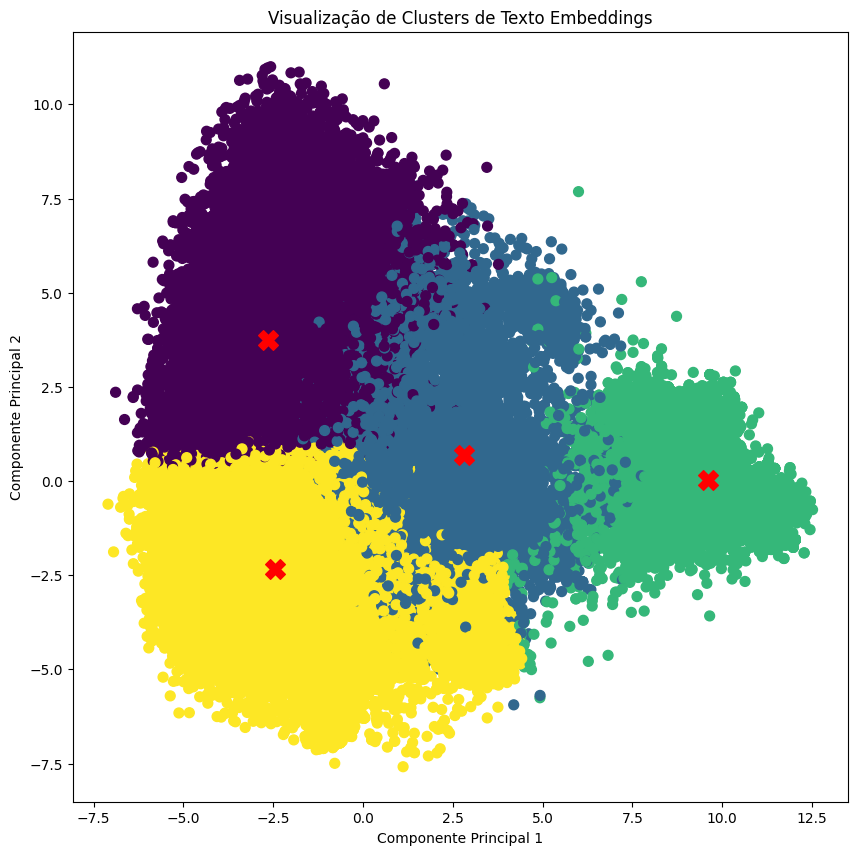

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(texto_embeddings)

plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=atribuicao, cmap='viridis', s=50)

centroids = modelo_agrupamento.cluster_centers_
centroid_pca = pca.transform(centroids)
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], c='red', s=200, marker='X')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização de Clusters de Texto Embeddings')
plt.show()

In [ ]:
df_agrupamento = pd.DataFrame(texto, columns = ['texto'])
df_agrupamento['atribuicao'] = atribuicao
df_agrupamento

texto  atribuicao
0      the president interpretation from spanish as t...           3
1      the president interpretation from spanish i sh...           1
2      mr sacirbey bosnia and herzegovina first mr pr...           3
3      the president interpretation from spanish the ...           2
4      mr nobilo croatia allow me sir to congratulate...           3
...                                                  ...         ...
82160  mr dai bing china spoke in chinese i thank spe...           0
82161  mr jiirgenson estonia i wish to thank you mr p...           0
82162  the president i will now make a statement in m...           3
82163  mr empole democratic republic of the congo spo...           3
82164  the president i now invite council members to ...           1

[82165 rows x 2 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remover_stopwords(text):
  resultado = " ".join([word for word in text.split() if word.lower() not in stop_words])
  return resultado

In [ ]:
df_agrupamento['texto'][0]

'the president interpretation from spanish as this is the first meeting of the security council to be held this year i should like to welcome the new members of the council botswana germany honduras indonesia and italy we all look forward with confidence to their participation in the work of the council which will be of invaluable assistance in the discharge of the council s enormous responsibilities as it tackles so many challenges i should also like to express the council s gratitude to the outgoing members for their important contributions to the council s work the representatives of brazil djibouti new zealand pakistan and spain all in an excellent manner contributed their talents to the conduct of the business of the council expression of thanks to the retiring president the president interpretation from spanish i should also like to pay a tribute to my predecessor ambassador manzi bakuramutsa of rwanda for the service he rendered as president of the council during the month of de

In [ ]:
df_agrupamento['texto'] = df_agrupamento['texto'].apply(remover_stopwords)

In [ ]:
df_agrupamento['texto'][0]

'president interpretation spanish first meeting security council held year like welcome new members council botswana germany honduras indonesia italy look forward confidence participation work council invaluable assistance discharge council enormous responsibilities tackles many challenges also like express council gratitude outgoing members important contributions council work representatives brazil djibouti new zealand pakistan spain excellent manner contributed talents conduct business council expression thanks retiring president president interpretation spanish also like pay tribute predecessor ambassador manzi bakuramutsa rwanda service rendered president council month december 1994 express deep appreciation ambassador bakuramutsa skilful manner conducted council business last month adoption agenda agenda adopted situation republic bosnia herzegovina president interpretation spanish like inform council received letter representative bosnia herzegovina requests invited participate 

###Gráfico de frequencia dos clusters

Gráfico mostra os clusters mais frequentes.

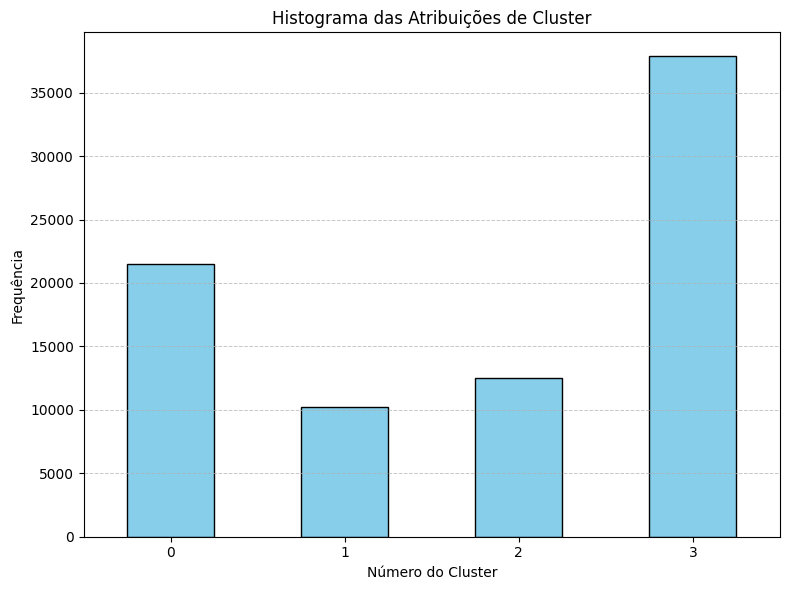

In [ ]:
plt.figure(figsize=(8, 6))
df_agrupamento['atribuicao'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histograma das Atribuições de Cluster')
plt.xlabel('Número do Cluster')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

### Nuvem de palavras relacionado com cada cluster

In [ ]:
from wordcloud import WordCloud

In [ ]:
def word_cloud(df_agrupamento, atribuicao):
  wc = ' '.join([texto for texto in df_agrupamento['texto'][df_agrupamento['atribuicao'] == atribuicao]])
  wordcloud = WordCloud(width=1000, height=600, random_state=67, max_font_size=110).generate(wc)
  fig7 = plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')

Palavras mais relacionadas a conflitos armados, há pedidos de proteção, direitos humanos provavelmente relacionados as mulheres, pode ter relação tambem com o continente africano , pois fala de crianças e da União da África.

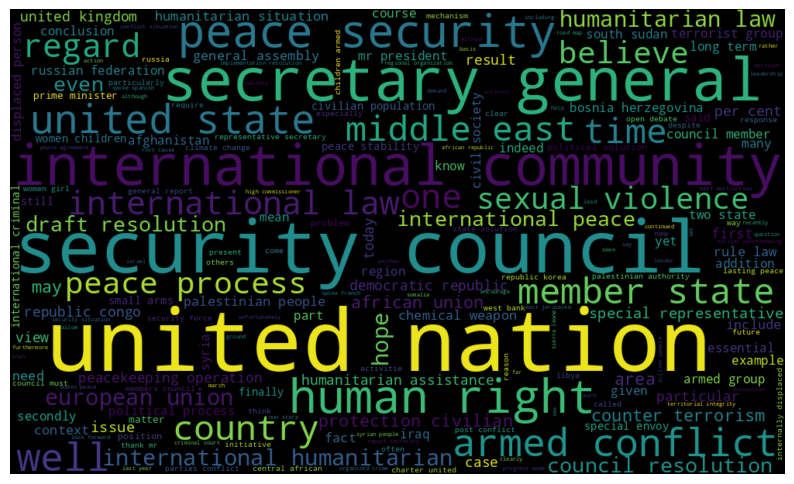

In [ ]:
word_cloud(df_agrupamento, 0)

Trata-se de debates onde ocorreu alguma votação/decisão sobre determinada situação.Criação de regras provisórias.

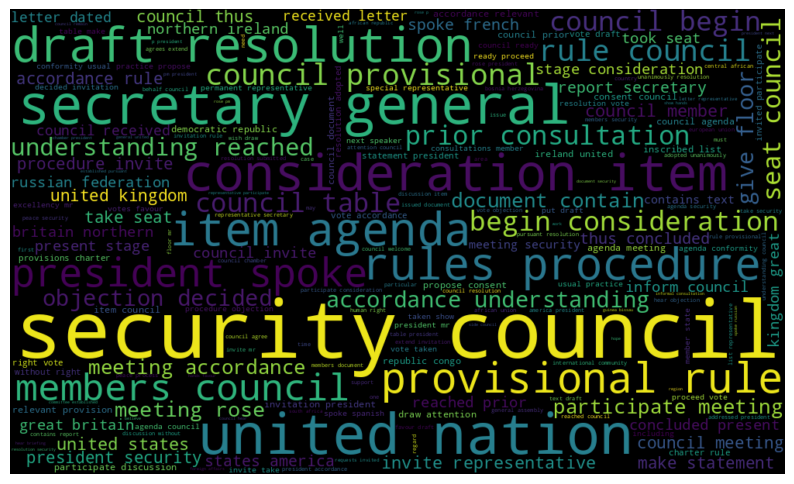

In [ ]:
word_cloud(df_agrupamento, 1)

Esta mais relacionado com as guerras no Oriente Médio , o país Israel é bem destacado assim como a Síria, observamos também a palavra "paz" com destaque, terrorismo também aparece timidamente, direitos humanos entre outros.

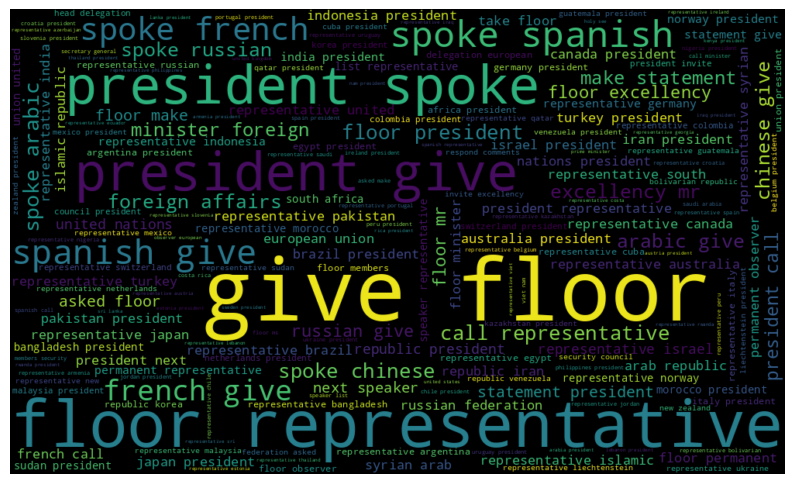

In [ ]:
word_cloud(df_agrupamento, 2)

Esta relacionado com a recepção dos representantes de cada nação.

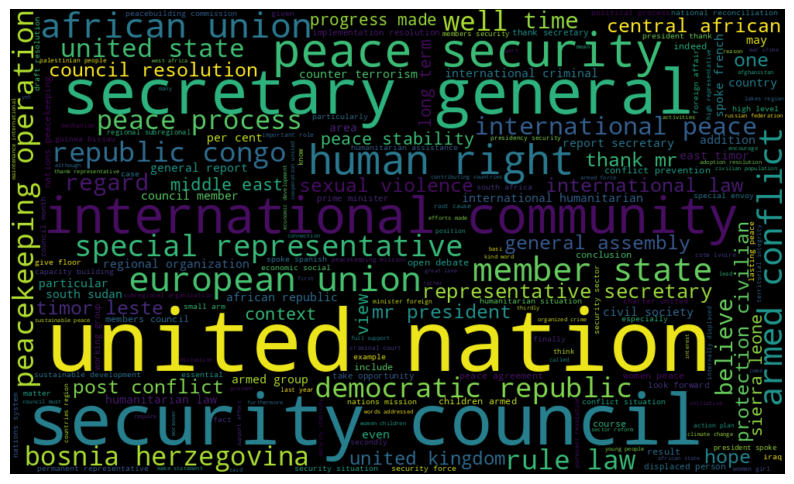

In [ ]:
word_cloud(df_agrupamento, 3)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

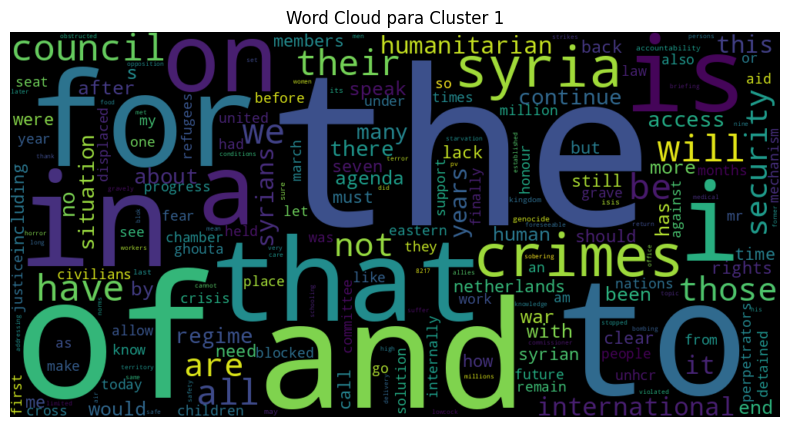

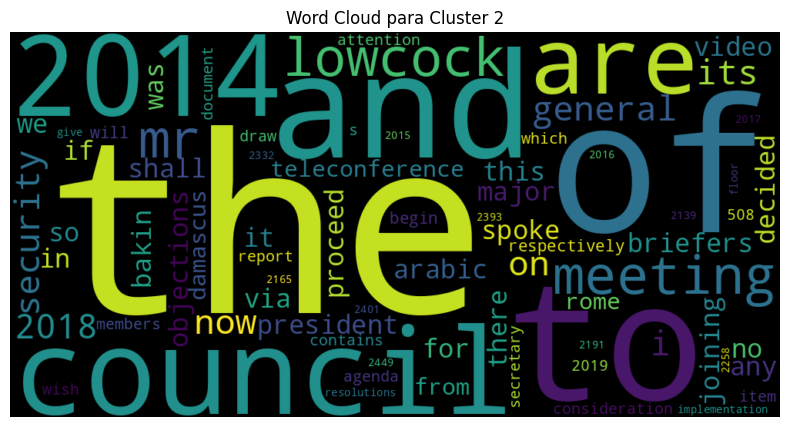

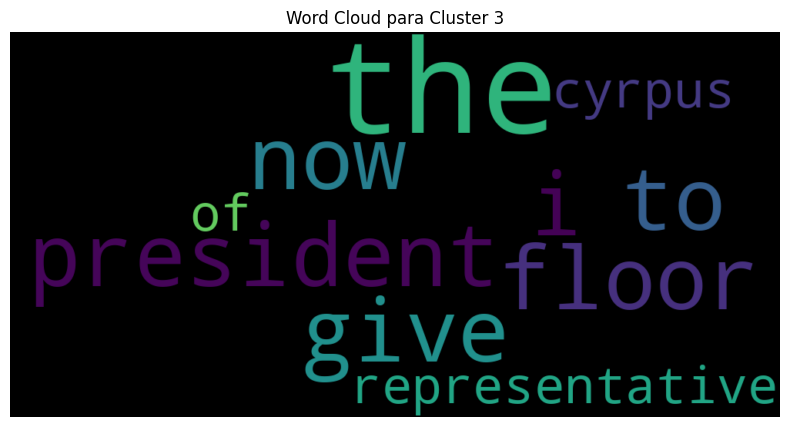

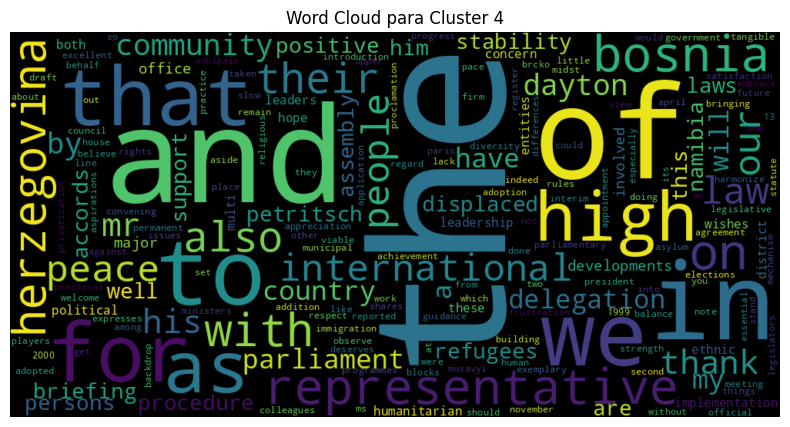

In [ ]:
mais_proximo, _ = pairwise_distances_argmin_min(centroids, texto_embeddings)

closest_texts = [texto[index] for index in mais_proximo]

for i, text in enumerate(closest_texts):
    words = text.split()
    word_freq = {word: words.count(word) for word in words}

    wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(word_freq)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud para Cluster {i+1}')
    plt.show()